In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
d=pd.read_csv('D:/ai/neural networks/data.csv')

In [2]:
df = pd.DataFrame(data=d)

In [3]:
ns = df.shape[0]


In [4]:
bs = 2
nb = np.ceil(len(df)/bs)
nb

2.0

In [29]:

import random
s = np.arange(len(df))
random.shuffle(s)
s

array([0, 3, 1, 2])

In [30]:
for i in s:
    print(df['x'][i],df['y'][i])

0.2 3.4
0.8 4.6
0.4 3.8
0.6 4.2


In [61]:
#intialization
n=0.1
i=1 
epochs=10000
m=1
c=-1
batch=nb-1
bt=1




In [62]:
while i<=epochs:
    j = 0
  # RUNNING ITERATION FOR N-1 BATCHES
    while (bt <= batch):
        der_m = 0
        der_c = 0
        err = 0
        for k in range(0,bs):
            der_m = der_m + (df['y'][s[j]] - (m*df['x'][s[j]])-c)*(df['x'][s[j]])
            der_c = der_c + (df['y'][s[j]] - (m*df['x'][s[j]])-c)
            j = j+1
      
  
    
        der_m = (-1/bs)*der_m
        der_c = (-1/bs)*der_c
        change_m = (-1)*n*der_m
        change_c = (-1)*n*der_c
    
        m = m + change_m
        c = c + change_c
        bt = bt + 1
    
 
  # EXECUTING FOR LAST BATCH
    der_m = 0
    der_c = 0
    err = 0
  # FINDING REMAINING NUMBER OF BATCHES
    es = len(s) - j  
  
    for k in range(j,len(s)):
        der_m = der_m + (df['y'][s[j]] - (m*df['x'][s[j]])-c)*(df['x'][s[j]])
        der_c = der_c + (df['y'][s[j]] - (m*df['x'][s[j]])-c)
        j = j + 1
        
    der_m = (-1/es)*der_m
    der_c = (-1/es)*der_c
    
    change_m = (-1)*n*der_m
    change_c = (-1)*n*der_c
  
    m = m + change_m
    c = c + change_c
  
    i = i + 1

        
    
  
print(m,c)

2.000000000000064 2.999999999999966


In [63]:
df['yp']=np.nan

In [64]:
for i in range(0,ns):
    df['yp'][i]=m*df['x'][i]+c

In [65]:
df

,x,y,yp
0,0.2,3.4,3.4
1,0.4,3.8,3.8
2,0.6,4.2,4.2
3,0.8,4.6,4.6


In [66]:
mse = 0
for i in range(0,len(df)):
  mse += (df['y'][i] -df['yp'][i])**2
mse = (1/len(df))*mse
mse

2.152111157056073e-28

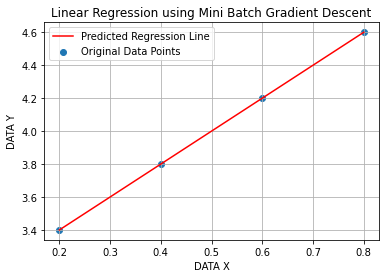

In [67]:
plt.scatter(df['x'],df['y'],label='Original Data Points')
plt.plot(df['x'],df['yp'],'red',label='Predicted Regression Line')
plt.legend()
plt.title("Linear Regression using Mini Batch Gradient Descent")
plt.xlabel("DATA X")
plt.ylabel("DATA Y")
plt.grid()